In [1]:
%reload_ext watermark
%reload_ext autoreload
%autoreload 2
%watermark -v -p numpy,sklearn,pandas
%watermark -v -p cv2,PIL,matplotlib
%watermark -v -p torch,torchvision,torchaudio
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.use_jedi = False

from IPython.display import display, HTML, Javascript
display(HTML('<style>.container { width:%d%% !important; }</style>' % 90))

def _IMPORT_(x):
    try:
        exec(x, globals())
    except:
        pass


CPython 3.6.9
IPython 7.16.1

numpy 1.19.4
sklearn 0.24.0
pandas 1.1.5
CPython 3.6.9
IPython 7.16.1

cv2 4.5.1
PIL 6.2.2
matplotlib 3.3.3
CPython 3.6.9
IPython 7.16.1

torch 1.8.0.dev20210103+cu101
torchvision 0.9.0.dev20210103+cu101
torchaudio not installed


In [2]:
###
### Common ###
###

import sys, os, io, time, random, math
import json, base64, requests
import os.path as osp

_IMPORT_('import numpy as np')
_IMPORT_('import pandas as pd')
_IMPORT_('from tqdm.notebook import tqdm')

def print_progress_bar(x):
    print('\r', end='')
    print('Progress: {}%:'.format(x), '%s%s' % ('▋'*(x//2), '.'*((100-x)//2)), end='')
    sys.stdout.flush()
    
###
### Display ###
###

_IMPORT_('import cv2')
_IMPORT_('from PIL import Image')
_IMPORT_('from torchvision.utils import make_grid')
_IMPORT_('import matplotlib.pyplot as plt')
_IMPORT_('import plotly')
_IMPORT_('import plotly.graph_objects as go')

# plotly.offline.init_notebook_mode(connected=False)

plt.rcParams['figure.figsize'] = (12.0, 8.0)

def show_video(video_path, width=None, height=None):
    W, H = '', ''
    if width:
        W = 'width=%d' % width
    if height:
        H = 'height=%d' % height
    if video_path.startswith('http'):
        data_url = video_path
    else:
        mp4 = open(video_path, 'rb').read()
        data_url = 'data:video/mp4;base64,' + base64.b64encode(mp4).decode()
    return HTML('<video %s %s controls src="%s" type="video/mp4"/>' % (W, H, data_url))

def show_image(image_path, width=None, height=None):
    W, H = '', ''
    if width:
        W = 'width=%d' % width
    if height:
        H = 'height=%d' % height
    if image_path.startswith('http'):
        data_url = image_path
    else:
        img = open(image_path, 'rb').read()
        data_url = 'data:image/jpg;base64,' + base64.b64encode(img).decode()
    return HTML('<img %s %s src="%s"/>' % (W, H, data_url))



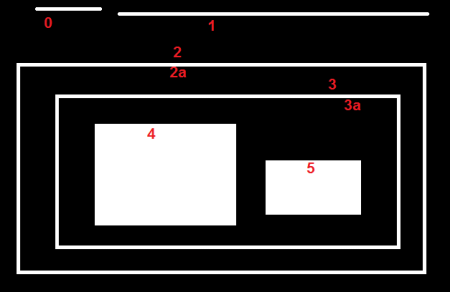

In [3]:
pic = 'hierarchy.png'
show_image(pic)


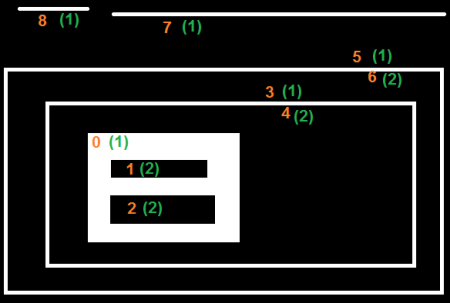

In [4]:
pic2 = 'hierarchy2.png'
show_image(pic2)

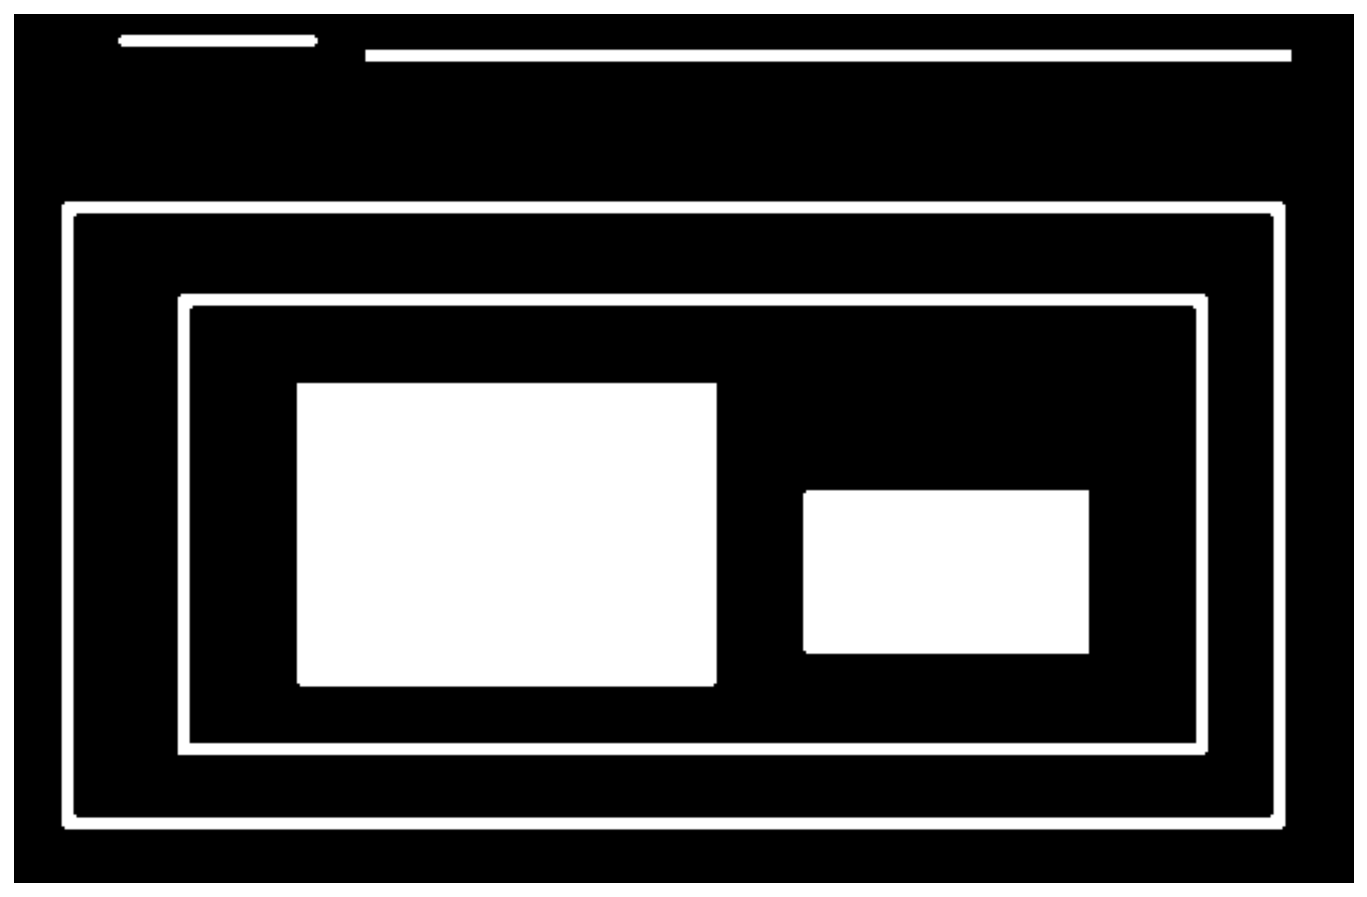

In [5]:
img_bgr = cv2.imread(pic)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)
img_pic = cv2.threshold(img_blur, 100, 255, cv2.THRESH_BINARY)[1]

plt.axis('off')
plt.imshow(img_pic, cmap='gray');

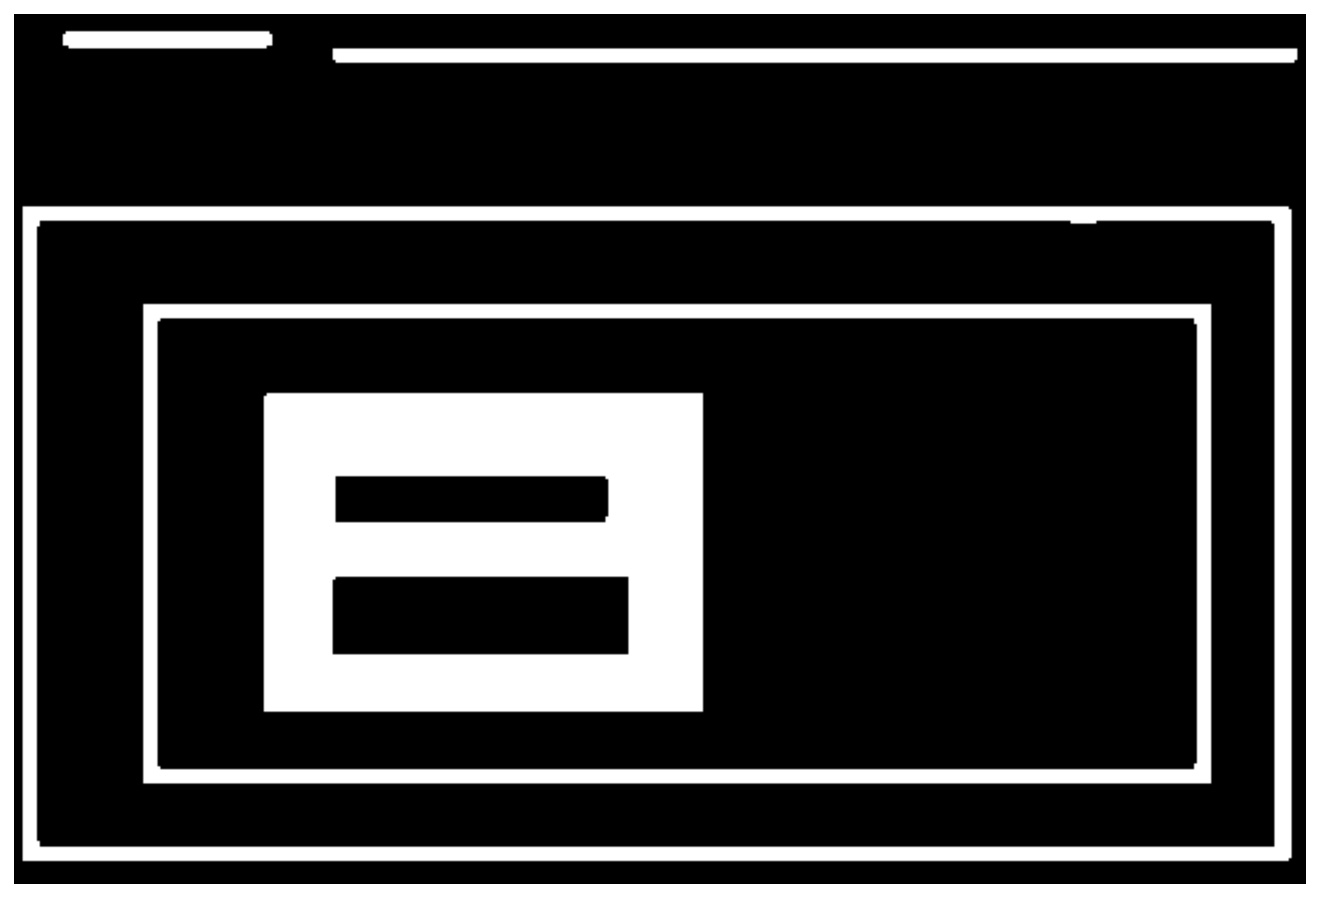

In [6]:
img_bgr = cv2.imread(pic2)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)
img_bin = cv2.threshold(img_blur, 156, 255, cv2.THRESH_BINARY)[1]
img_pic2 = cv2.dilate(img_bin, None, iterations=1)

plt.axis('off')
plt.imshow(img_pic2, cmap='gray');

In [7]:
def show_contour(img, mode):
    im = img.copy()
    contours, hierarchy = cv2.findContours(img, mode, cv2.CHAIN_APPROX_NONE)
    for i, cnt in enumerate(contours):
        x, y, w, h = cv2.boundingRect(cnt)
        plt.text(x + 2, y + 3, '%d' % i)
        cv2.drawContours(im, contours, i, (255, 0, 0), 4)

    print('[Next, Previous, First_Child, Parent]')
    print(hierarchy[0])
    plt.axis('off')
    plt.title('contours:%d' % len(contours))
    plt.imshow(im, cmap='gray');

## RETR_LIST

It simply retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours.

[Next, Previous, First_Child, Parent]
[[ 1 -1 -1 -1]
 [ 2  0 -1 -1]
 [ 3  1 -1 -1]
 [ 4  2 -1 -1]
 [ 5  3 -1 -1]
 [ 6  4 -1 -1]
 [ 7  5 -1 -1]
 [-1  6 -1 -1]]


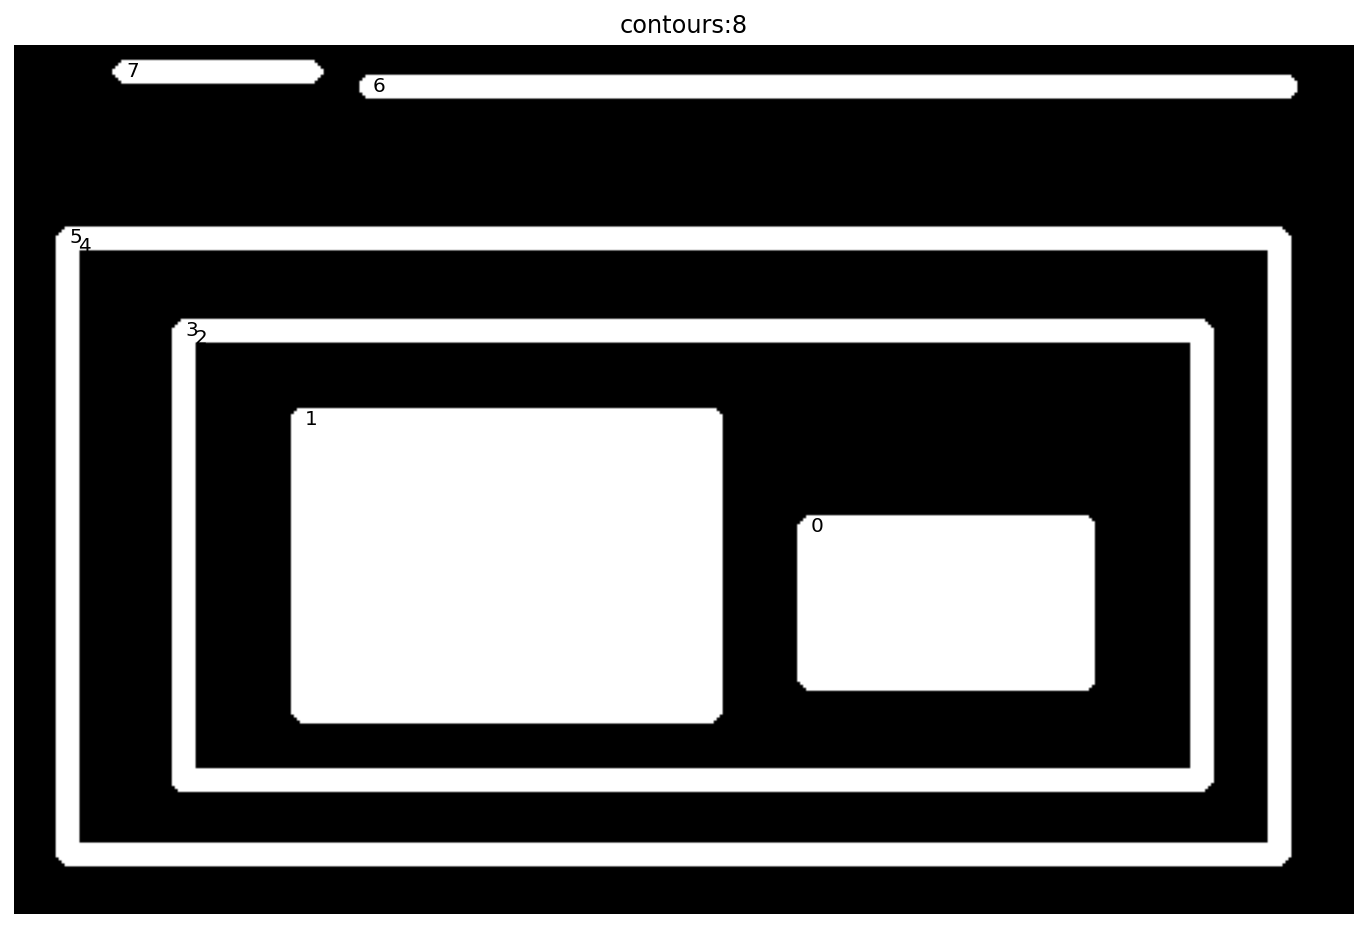

In [8]:
show_contour(img_pic, cv2.RETR_LIST)

## RETR_EXTERNAL

If you use this flag, it returns only extreme outer flags. All child contours are left behind. We can say, under this law, Only the eldest in every family is taken care of. It doesn't care about other members of the family


[Next, Previous, First_Child, Parent]
[[ 1 -1 -1 -1]
 [ 2  0 -1 -1]
 [-1  1 -1 -1]]


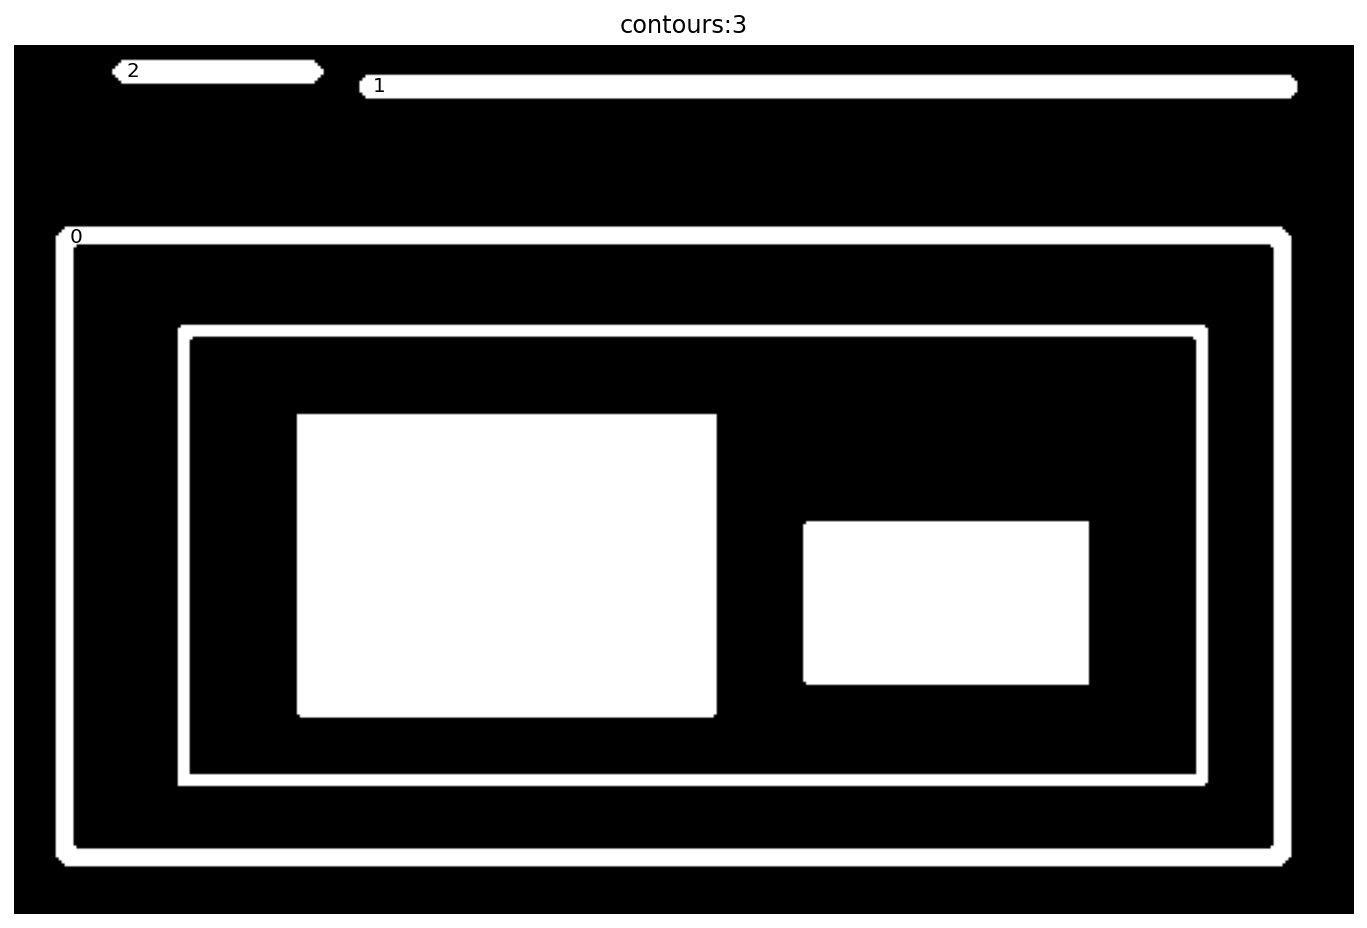

In [9]:
show_contour(img_pic, cv2.RETR_EXTERNAL)

## RETR_CCOMP

This flag retrieves all the contours and arranges them to a 2-level hierarchy

[Next, Previous, First_Child, Parent]
[[ 3 -1  1 -1]
 [ 2 -1 -1  0]
 [-1  1 -1  0]
 [ 5  0  4 -1]
 [-1 -1 -1  3]
 [ 7  3  6 -1]
 [-1 -1 -1  5]
 [ 8  5 -1 -1]
 [-1  7 -1 -1]]


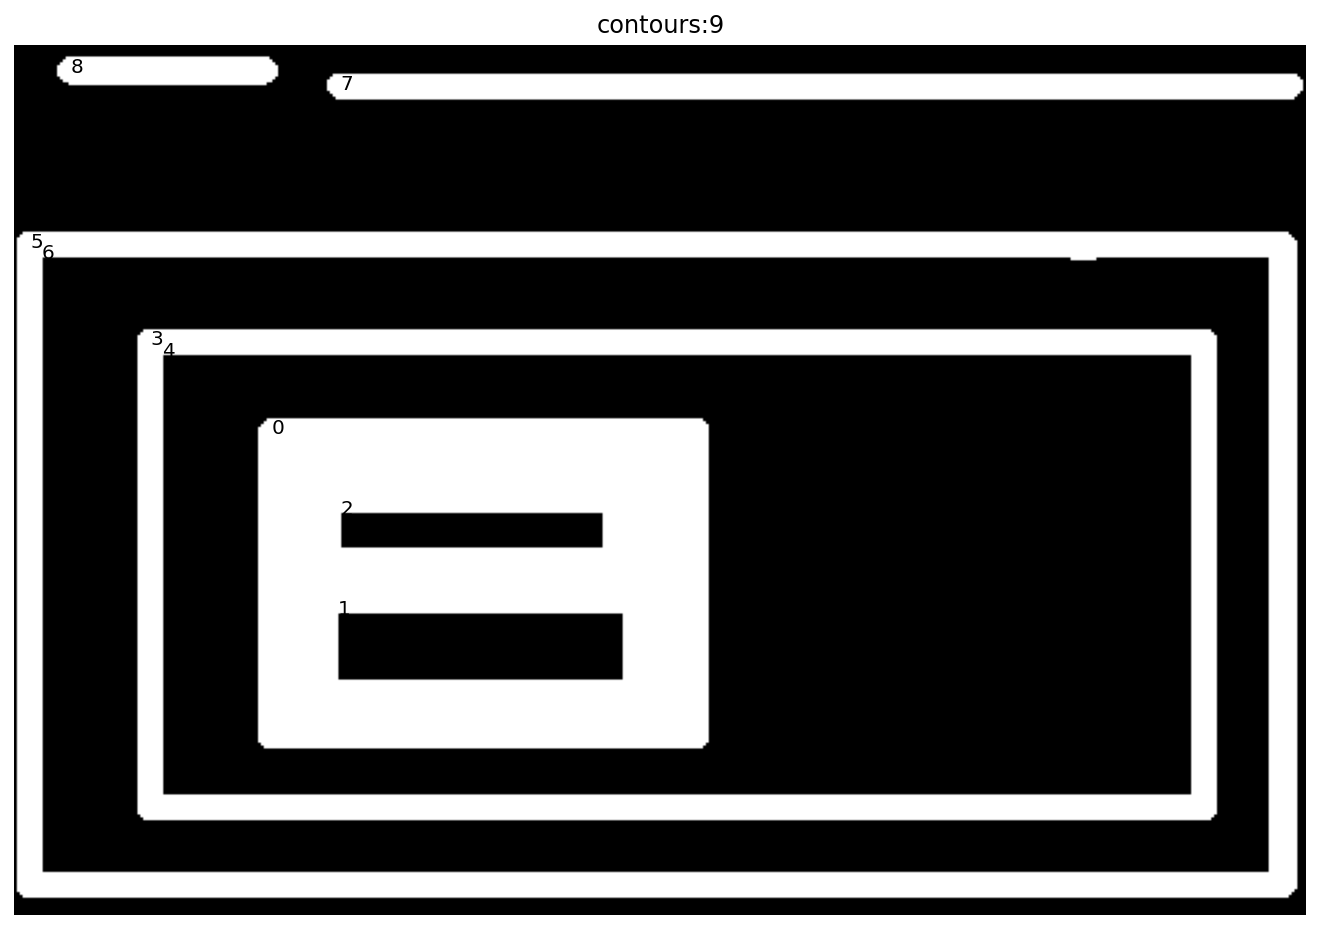

In [10]:
show_contour(img_pic2, cv2.RETR_CCOMP)

[Next, Previous, First_Child, Parent]
[[ 7 -1  1 -1]
 [-1 -1  2  0]
 [-1 -1  3  1]
 [-1 -1  4  2]
 [-1 -1  5  3]
 [ 6 -1 -1  4]
 [-1  5 -1  4]
 [ 8  0 -1 -1]
 [-1  7 -1 -1]]


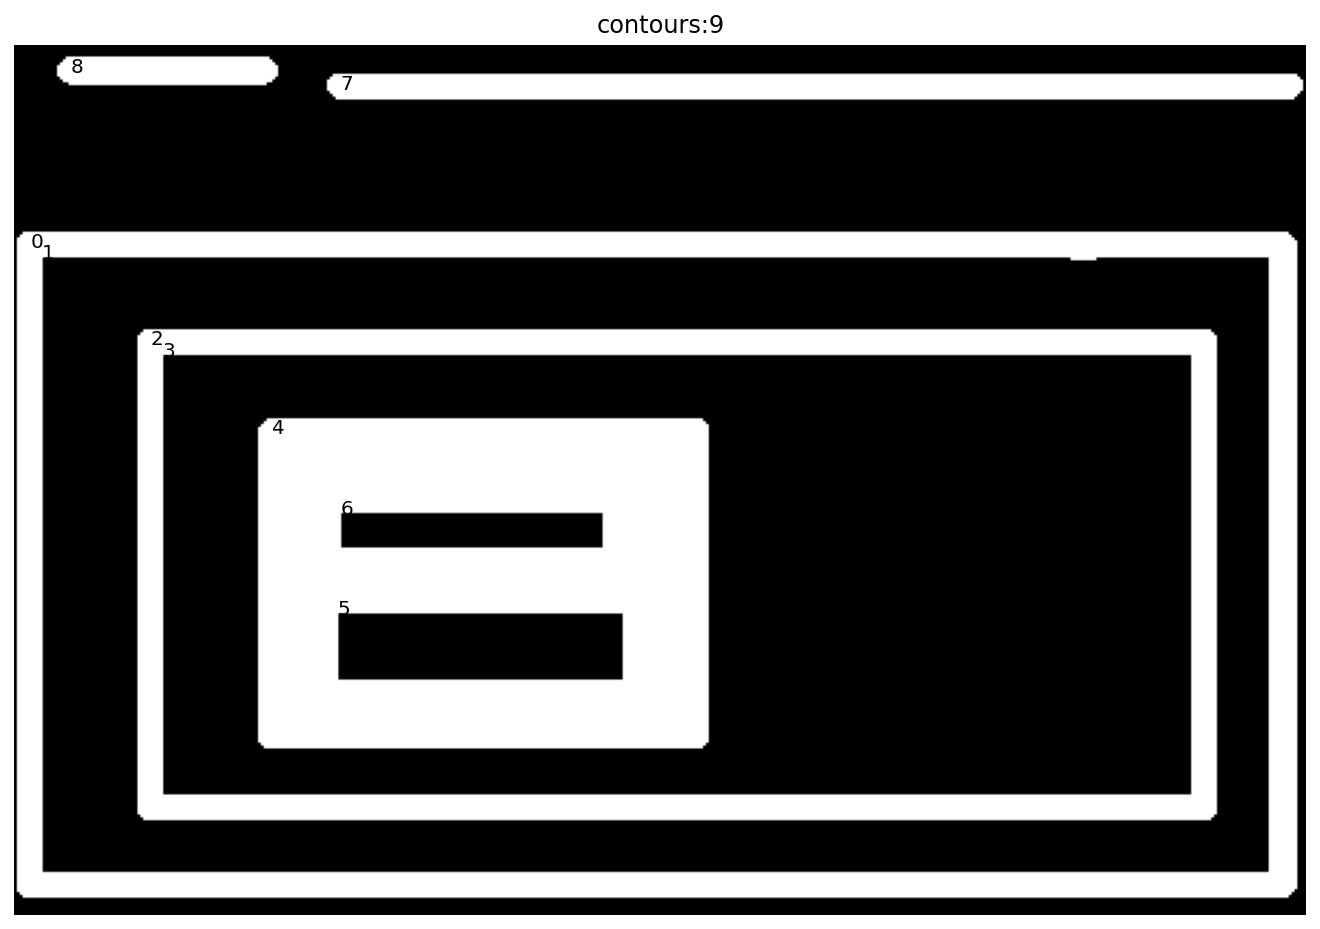

In [11]:
show_contour(img_pic2, cv2.RETR_TREE)

https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html